In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd

# Needed for some plotting
import matplotlib.pyplot as plt

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [2]:
adata = sc.read_h5ad('/mnt/hsKidAt/blake_LTS/Atlas_V2/h5ad/Human_Kidney_Atlas_V2_03-2025_Object_PT.h5ad')
adata

AnnData object with n_obs × n_vars = 463477 × 36588
    obs: 'library', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'v1_barcode', 'source', 'assay', 'experiment_long', 'experiment', 'patient', 'specimen', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1clusters', 'v1.subclass.l3', 'v1.subclass.l2', 'v1.subclass.l1', 'v1.state.l1', 'v1.state.l2', 'v1.class', 'v1.structure', 'group', 'v2.clusters', 'v2.subclass.full', 'v2.subclass.l3', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.s

In [3]:
#AKI patient groups
recovered = ['30-10044','30-10125','30-10868','30-10929','30-11084','32-10003','32-10074','32-10333','33-10331','33-10376','34-10050','34-10187','34-10240','34-10393']
progressed = ['30-10018','30-10034','30-10631','30-11051','30-11080','30-11081','32-10205','32-2','34-10184','34-10209','34-10331','34-10579']

#Subset to AKI patients
adata = adata[adata.obs['patient'].isin(recovered + progressed)].copy()
adata

AnnData object with n_obs × n_vars = 30058 × 36588
    obs: 'library', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'v1_barcode', 'source', 'assay', 'experiment_long', 'experiment', 'patient', 'specimen', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1clusters', 'v1.subclass.l3', 'v1.subclass.l2', 'v1.subclass.l1', 'v1.state.l1', 'v1.state.l2', 'v1.class', 'v1.structure', 'group', 'v2.clusters', 'v2.subclass.full', 'v2.subclass.l3', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.st

In [4]:
# Create a mapping of patient IDs to their groups
patient_groups = {
    '30-10044': 'recovered',
    '30-10125': 'recovered',
    '30-10868': 'recovered',
    '30-10929': 'recovered',
    '30-11084': 'recovered',
    '32-10003': 'recovered',
    '32-10074': 'recovered',
    '32-10333': 'recovered',
    '33-10331': 'recovered',
    '33-10376': 'recovered',
    '34-10050': 'recovered',
    '34-10187': 'recovered',
    '34-10240': 'recovered',
    '34-10393': 'recovered',
    '30-10018': 'progressed',
    '30-10034': 'progressed',
    '30-10631': 'progressed',
    '30-11051': 'progressed',
    '30-11080': 'progressed',
    '30-11081': 'progressed',
    '32-10205': 'progressed',
    '32-2': 'progressed',
    '34-10184': 'progressed',
    '34-10209': 'progressed',
    '34-10331': 'progressed',
    '34-10579': 'progressed'
}

# Create the new column in adata.obs
adata.obs['patient_group'] = adata.obs['patient'].map(patient_groups)

# Verify the new column was added
print("New columns in adata.obs:", adata.obs.columns.tolist())

New columns in adata.obs: ['library', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'v1_barcode', 'source', 'assay', 'experiment_long', 'experiment', 'patient', 'specimen', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1clusters', 'v1.subclass.l3', 'v1.subclass.l2', 'v1.subclass.l1', 'v1.state.l1', 'v1.state.l2', 'v1.class', 'v1.structure', 'group', 'v2.clusters', 'v2.subclass.full', 'v2.subclass.l3', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.state.l1', 'v2.class', 'v2.structur

In [5]:
adata.X = adata.layers['counts'].copy()

In [6]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X

In [7]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    adata,
    sample_col='patient',
    groups_col='v2.subclass.l3',
    layer='counts',
    mode='sum',
    min_cells=10,
    min_counts=1000
)
pdata

AnnData object with n_obs × n_vars = 321 × 33789
    obs: 'patient', 'v2.subclass.l3', 'source', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1.class', 'group', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.state.l1', 'v2.class', 'v2.structure', 'patient_group', 'psbulk_n_cells', 'psbulk_counts'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_c

In [8]:
# Store raw counts in layers
pdata.layers['counts'] = pdata.X.copy()

# Normalize, scale and compute pca
sc.pp.normalize_total(pdata, target_sum=1e4)
sc.pp.log1p(pdata)
sc.pp.scale(pdata, max_value=10)
sc.tl.pca(pdata)

# Return raw counts to X
dc.swap_layer(pdata, 'counts', X_layer_key=None, inplace=True)

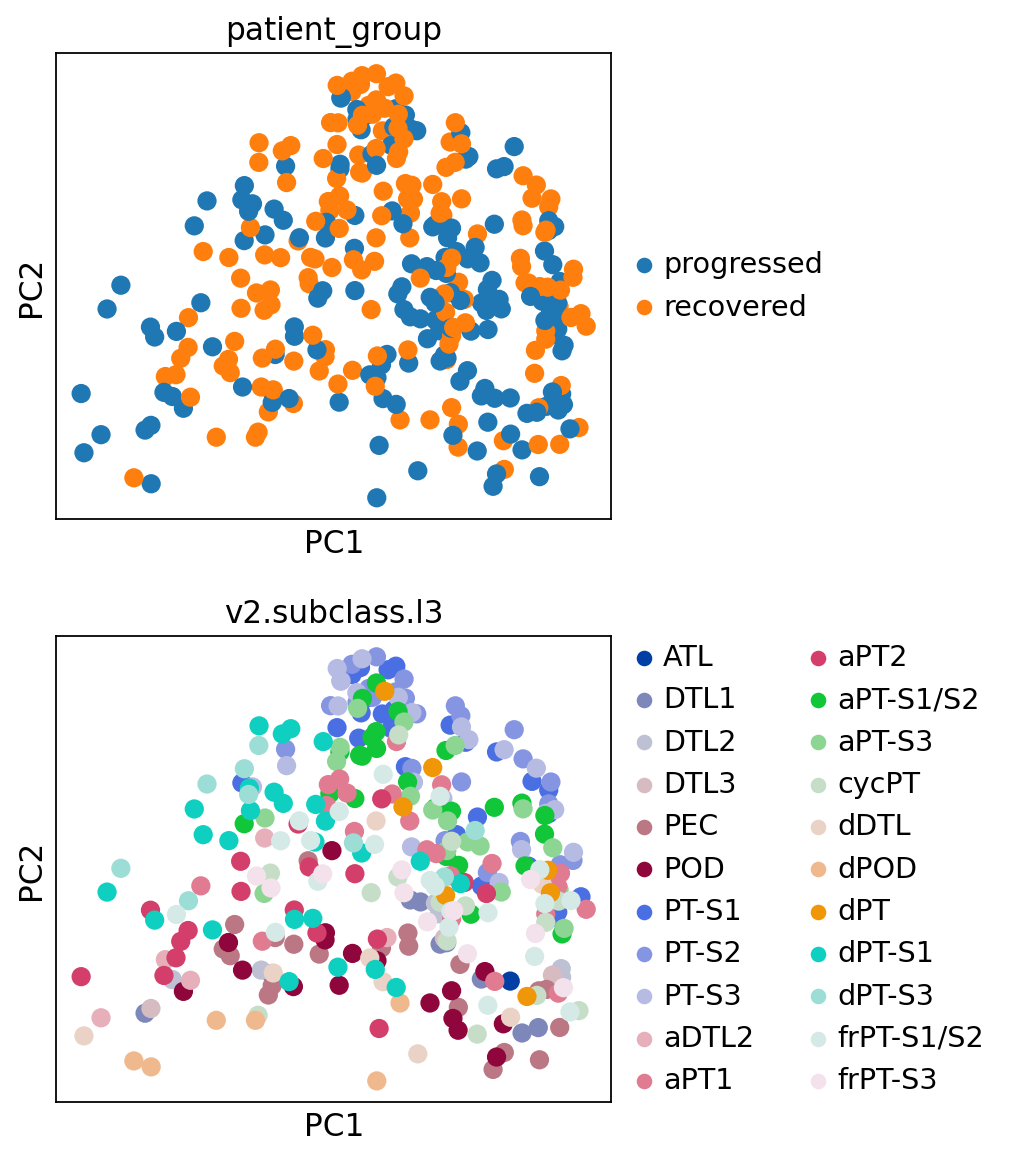

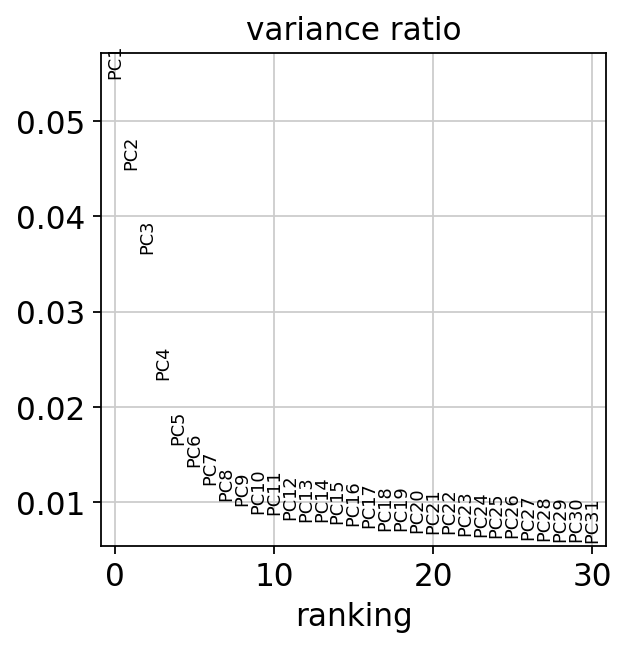

In [9]:
sc.pl.pca(pdata, color=['patient_group', 'v2.subclass.l3'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

In [10]:
#Pseudo-bulk profile gene filtering

In [11]:
# Select all aPT cell profiles
#PT = pdata[pdata.obs['v2.subclass.l2'] == 'aPT'].copy()
PT = pdata[pdata.obs['v2.subclass.l2'].isin(['aPT', 'frPT'])].copy()

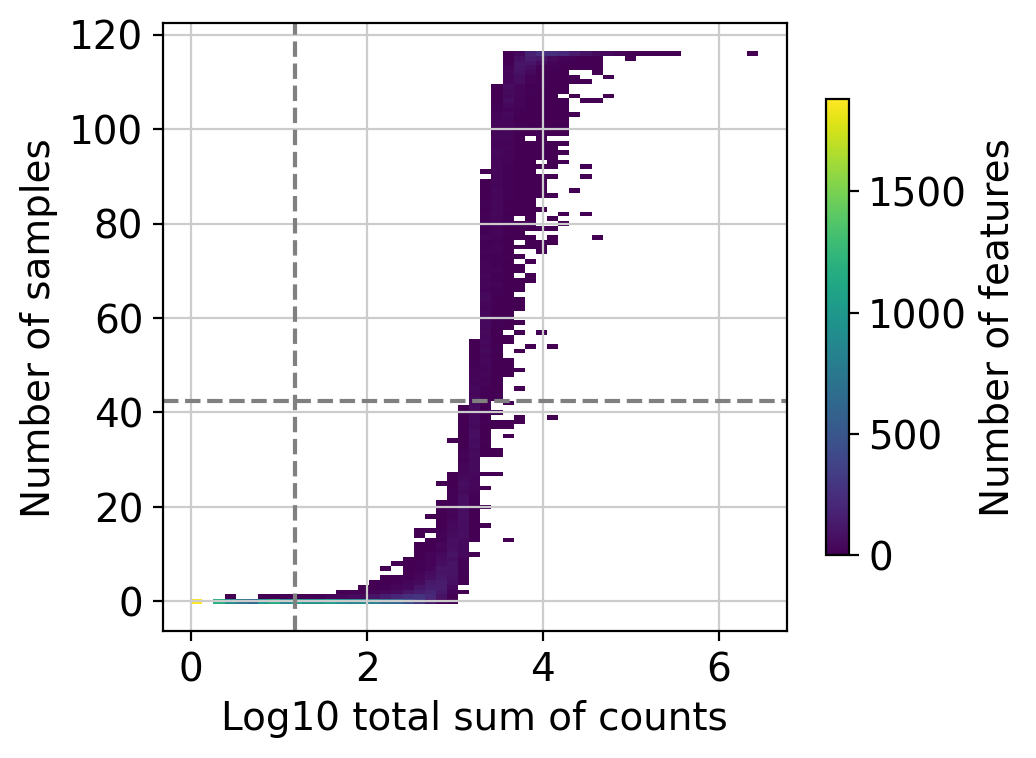

In [12]:
dc.plot_filter_by_expr(PT, group='patient_group', min_count=10, min_total_count=15)

In [13]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(PT, group='patient_group', min_count=10, min_total_count=15)

# Filter by these genes
PT = PT[:, genes].copy()
PT

AnnData object with n_obs × n_vars = 116 × 6349
    obs: 'patient', 'v2.subclass.l3', 'source', 'condition_level3', 'condition_level2', 'condition_level1', 'condition', 'percent_cortex', 'percent_medulla', 'region_level3', 'region_level2', 'region_level1', 'age_binned', 'sex', 'race', 'KDIGO_stage', 'baseline_eGFR_binned', 'proteinuria_binned', 'A1c_binned', 'albuminuria_binned', 'diabetes_history', 'diabetes_duration', 'hypertension_history', 'hypertension_duration', 'on_RAAS_blockade', 'ckd_stageC', 'adj_cm_ati.ain', 'location', 'laterality', 'protocol', 'tissue_type_full', 'tissue_type', 'atlas_version', 'v1.class', 'group', 'v2.subclass.l2', 'v2.subclass.sp', 'v2.subclass.l1', 'v2.state.l2', 'v2.state.l1', 'v2.class', 'v2.structure', 'patient_group', 'psbulk_n_cells', 'psbulk_counts'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_co

In [14]:
#Contrast between conditions

In [15]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

In [16]:
# Build DESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    adata=PT,
    design='patient_group',
    refit_cooks=True,
    inference=inference,
)

In [17]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 0.81 seconds.

Fitting dispersion trend curve...
/share/blake/anaconda3/envs/py3.11.new/lib/python3.11/site-packages/pydeseq2/dds.py:804: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.12 seconds.

Fitting MAP dispersions...
... done in 0.93 seconds.

Fitting LFCs...
... done in 0.64 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 4 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



In [18]:
# Extract contrast between ACLT vs normal
stat_res = DeseqStats(
    dds,
    contrast=["patient_group", 'progressed', 'recovered'],
    inference=inference,
)

In [19]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: patient_group progressed vs recovered
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1CF     22.727561       -0.472801  0.212872 -2.221060  0.026347  0.118848
A4GALT   16.424451       -0.060073  0.153915 -0.390304  0.696312  0.847562
AAGAB    19.502670       -0.021379  0.066008 -0.323885  0.746025  0.877945
AAK1    134.583885       -0.036828  0.075613 -0.487060  0.626216  0.802552
AAMDC    15.230855        0.155656  0.092003  1.691856  0.090673  0.260727
...            ...             ...       ...       ...       ...       ...
ZSWIM7   14.159523        0.015928  0.088033  0.180938  0.856416  0.938222
ZSWIM8   13.286617        0.048610  0.109310  0.444700  0.656537  0.819806
ZXDC     32.784577       -0.095152  0.070194 -1.355569  0.175236  0.389284
ZYG11B   32.152387       -0.074476  0.069901 -1.065451  0.286672  0.519281
ZZEF1    25.025447       -0.073353  0.078945 -0.929166  0.352803  0.585628

[6349 rows x 6 columns]

... done in 0.29 seconds.



In [20]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1CF,22.727561,-0.472801,0.212872,-2.221060,0.026347,0.118848
A4GALT,16.424451,-0.060073,0.153915,-0.390304,0.696312,0.847562
AAGAB,19.502670,-0.021379,0.066008,-0.323885,0.746025,0.877945
AAK1,134.583885,-0.036828,0.075613,-0.487060,0.626216,0.802552
AAMDC,15.230855,0.155656,0.092003,1.691856,0.090673,0.260727
...,...,...,...,...,...,...
ZSWIM7,14.159523,0.015928,0.088033,0.180938,0.856416,0.938222
ZSWIM8,13.286617,0.048610,0.109310,0.444700,0.656537,0.819806
ZXDC,32.784577,-0.095152,0.070194,-1.355569,0.175236,0.389284
ZYG11B,32.152387,-0.074476,0.069901,-1.065451,0.286672,0.519281


In [21]:
#write results_df to csv
results_df.to_csv('/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_DEG_Results_06182025.csv', index=True)

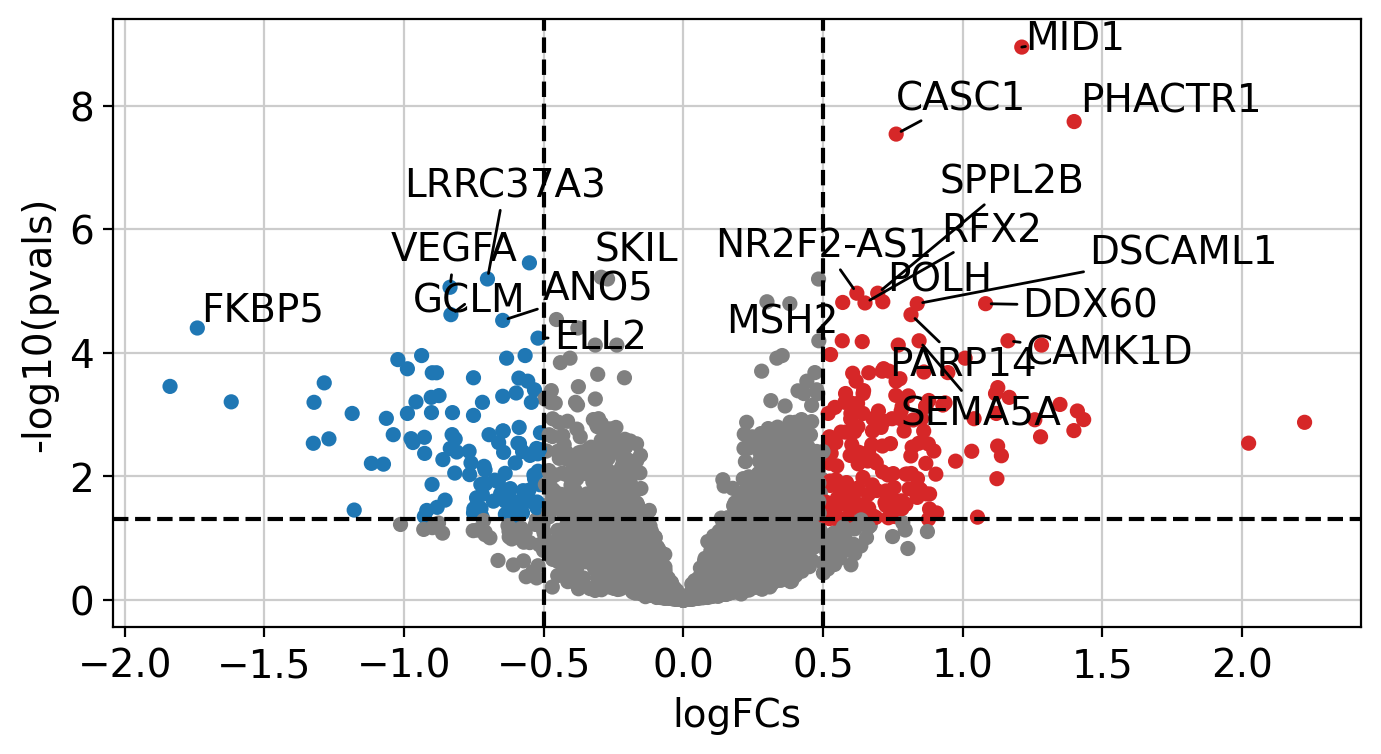

In [22]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    figsize=(8, 4),
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-prog_DEG_Volcano_06182025.pdf'
)

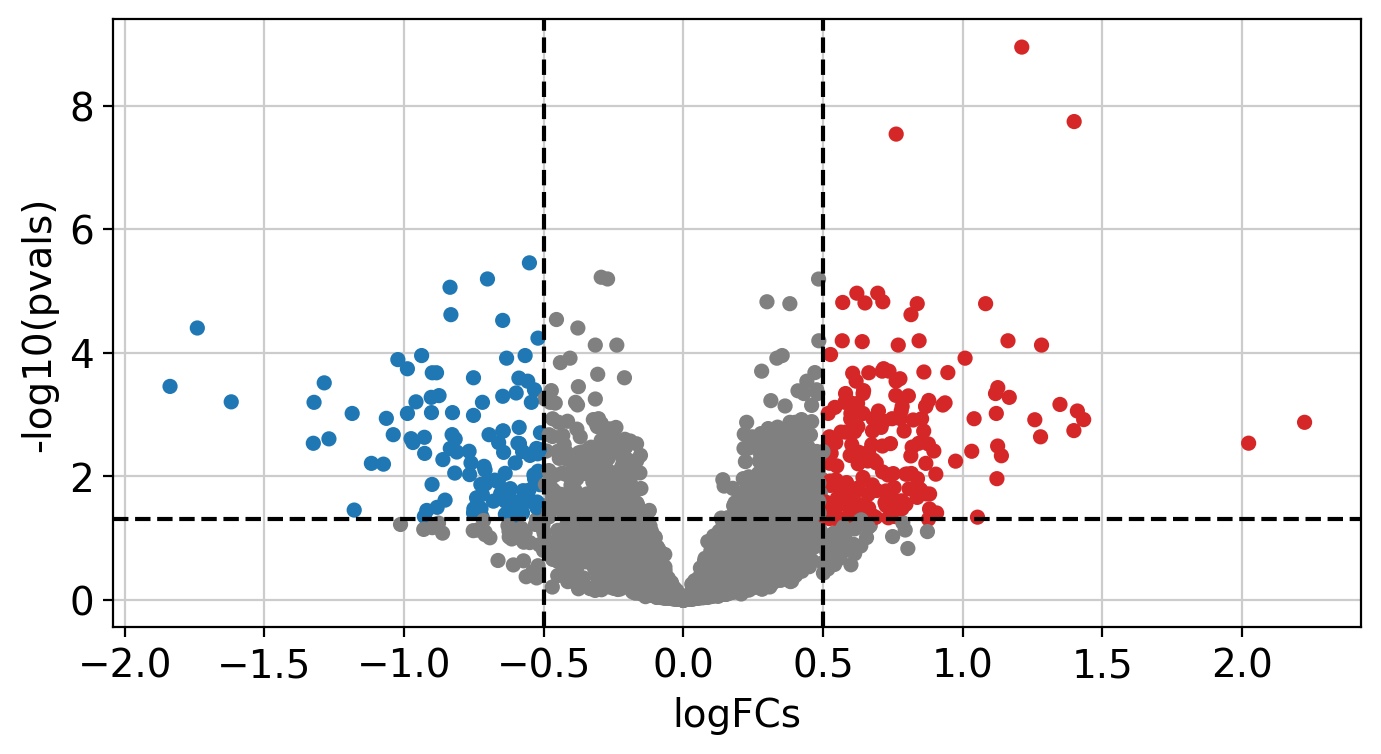

In [23]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=0,
    figsize=(8, 4),
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-prog_DEG_Volcano_06182025_B.pdf'
)

In [24]:
mat = results_df[['stat']].T.rename(index={'stat': 'aPT'})
mat

,A1CF,A4GALT,AAGAB,AAK1,AAMDC,AASDH,AASDHPPT,AASS,AATF,ABAT,...,ZSCAN30,ZSCAN5A,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZXDC,ZYG11B,ZZEF1
aPT,-2.22106,-0.390304,-0.323885,-0.48706,1.691856,-2.634972,-0.968052,-4.041291,-0.950389,-1.973119,...,-0.49886,-0.388078,1.129089,-1.817611,-0.417115,0.180938,0.4447,-1.355569,-1.065451,-0.929166


In [25]:
#Transcription factor activity inference

In [26]:
# read in trajectory (aPT2->PT-S1) TF-Gene interactions from scMEGA
tf_gene = pd.read_csv('/weka/blake/Projects/Human_Kidney/Atlas_V2/trajectories/aPT2-PT-S1_TF-Gene_Weight_Table.txt', sep='\t')
tf_gene

,source,target,weight
0,ARNT2,CSDC2,-0.968761
1,ARNT2,CHST9,0.964331
2,ARNT2,APBB1IP,0.962056
3,ARNT2,KCNK5,-0.958774
4,ARNT2,ANTXR1,0.954340
...,...,...,...
18495,VEZF1,LRRC28,-0.916307
18496,VEZF1,STK17A,0.915943
18497,VEZF1,IGF1R,-0.915844
18498,VEZF1,ENAH,0.915553


In [27]:
#Activity inference with Univariate Linear Model (ULM)

In [28]:
# Infer pathway activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=tf_gene)
tf_acts

,ARNT2,ATF3,ATF4,BACH2,BHLHE40,CEBPD,EGR1,ELF3,ETS1,FOSL2,...,NFKB2,NR2F1,POU3F3,RELB,RUNX2,SOX4,SOX9,STAT1,THRB,VEZF1
aPT,21.476526,19.327644,17.471497,17.405056,21.00651,11.544253,18.162317,18.197365,17.745018,17.345129,...,20.546124,-18.402723,19.486855,21.64282,18.777534,20.018566,19.589918,18.769815,-20.858541,19.274242


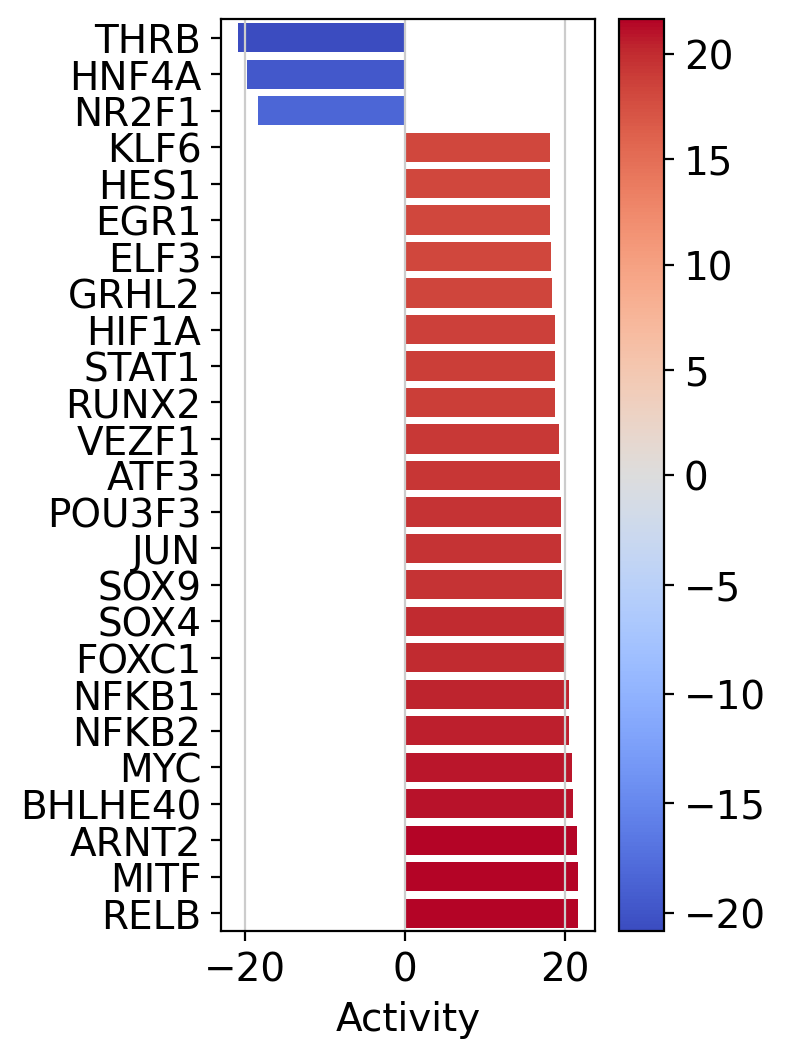

In [29]:
dc.plot_barplot(
    acts=tf_acts,
    contrast='aPT',
    top=25,
    vertical=True,
    figsize=(3, 6),
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_scMEGA_barplot_06182025.pdf'
)

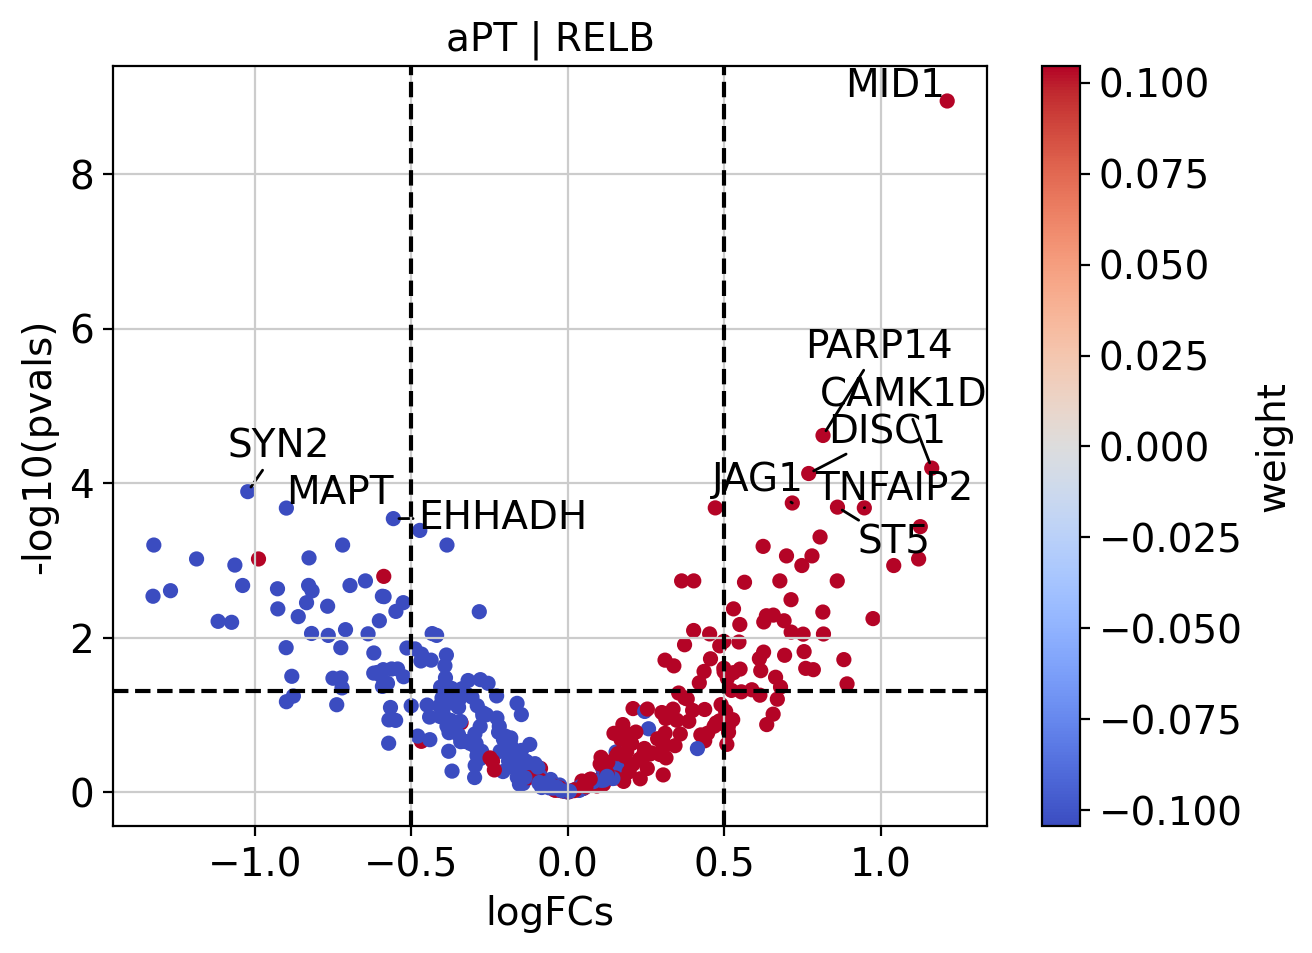

In [30]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'aPT'})
pvals = results_df[['padj']].T.rename(index={'padj': 'aPT'})

# Plot
dc.plot_volcano(
    logFCs=logFCs,
    pvals=pvals,
    contrast='aPT',
    name='RELB',
    net=tf_gene,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_scMEGA_Volvano_RELB_06182025.pdf'
)

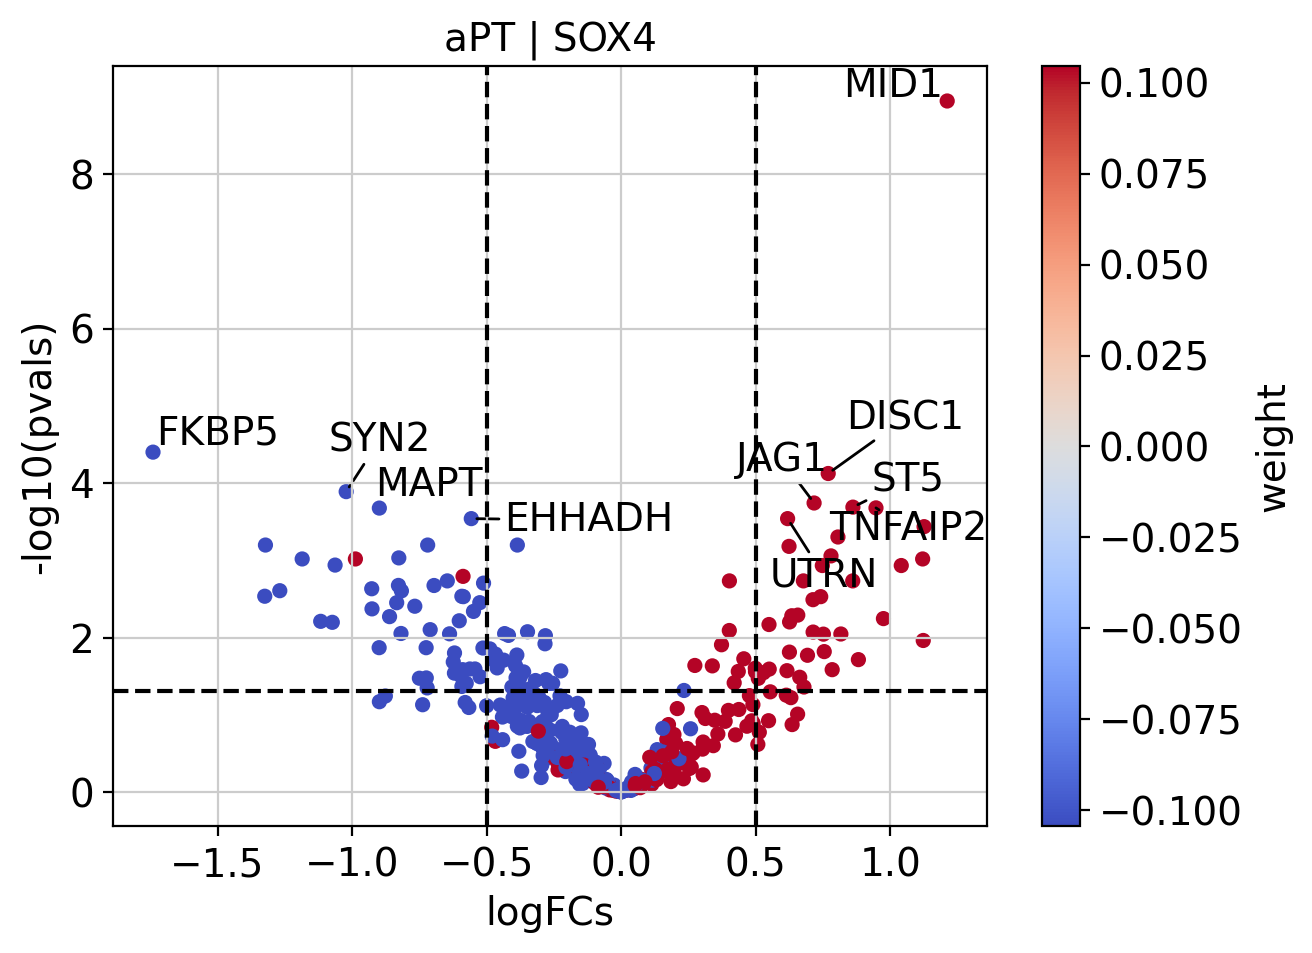

In [40]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'aPT'})
pvals = results_df[['padj']].T.rename(index={'padj': 'aPT'})

# Plot
dc.plot_volcano(
    logFCs=logFCs,
    pvals=pvals,
    contrast='aPT',
    name='SOX4',
    net=tf_gene,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_scMEGA_Volvano_SOX4_06182025.pdf'
)

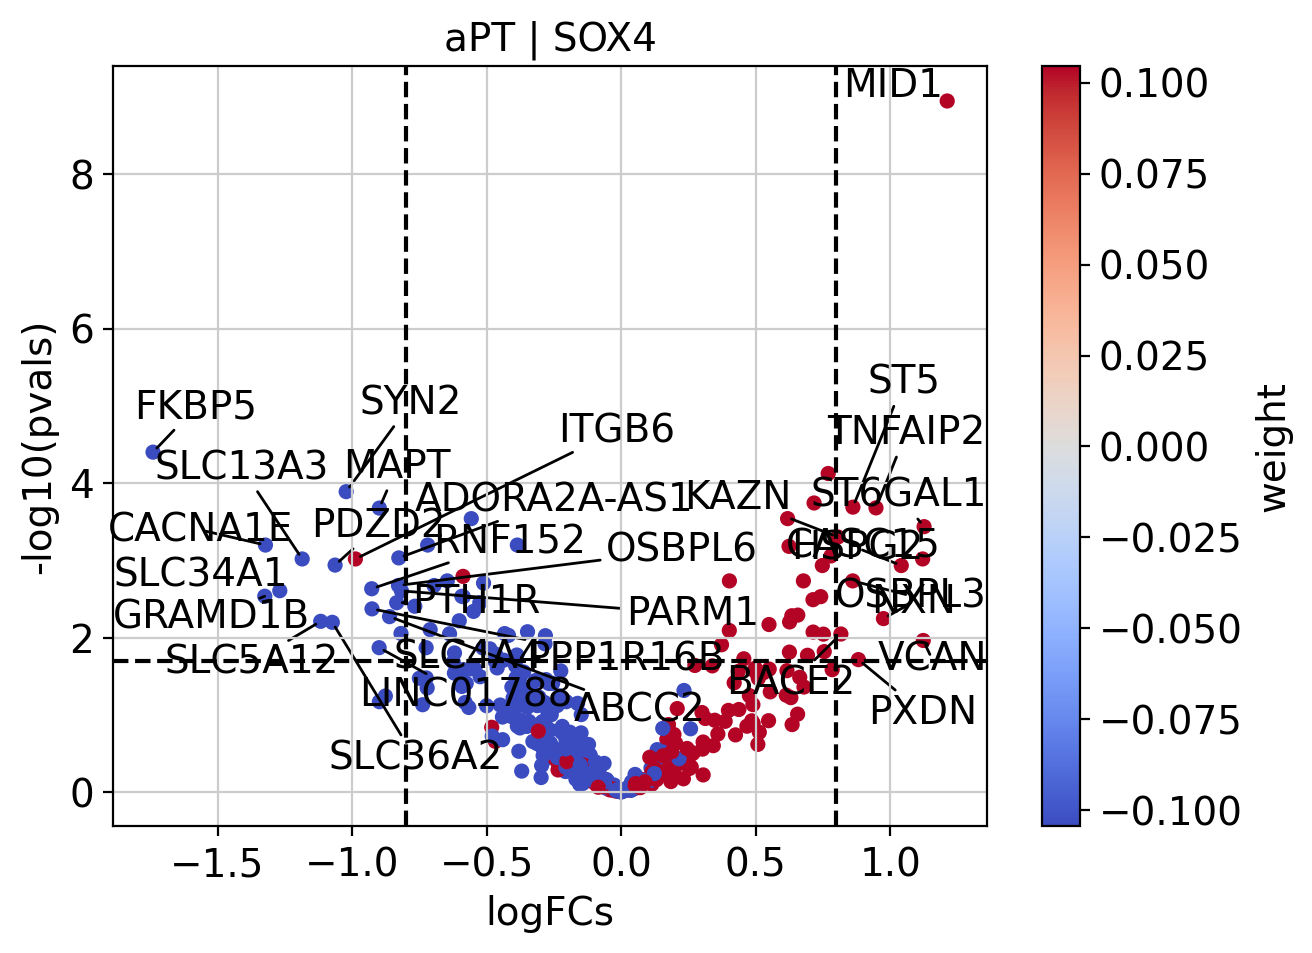

In [41]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'aPT'})
pvals = results_df[['padj']].T.rename(index={'padj': 'aPT'})

# Plot
dc.plot_volcano(
    logFCs=logFCs,
    pvals=pvals,
    contrast='aPT',
    name='SOX4',
    net=tf_gene,
    top=40,
    sign_thr=0.02,
    lFCs_thr=0.8,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_scMEGA_Volvano_SOX4_06182025_B.pdf'
)

In [32]:
#Extract all SOX4 targets in results_df
sox4_targets = tf_gene[tf_gene['source'] == 'SOX4']['target']

sox4_results = results_df[results_df.index.isin(sox4_targets)]
sox4_results

#write sox4_results to csv
sox4_results.to_csv('/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_SOX4_Targets_06182025.csv', index=True)


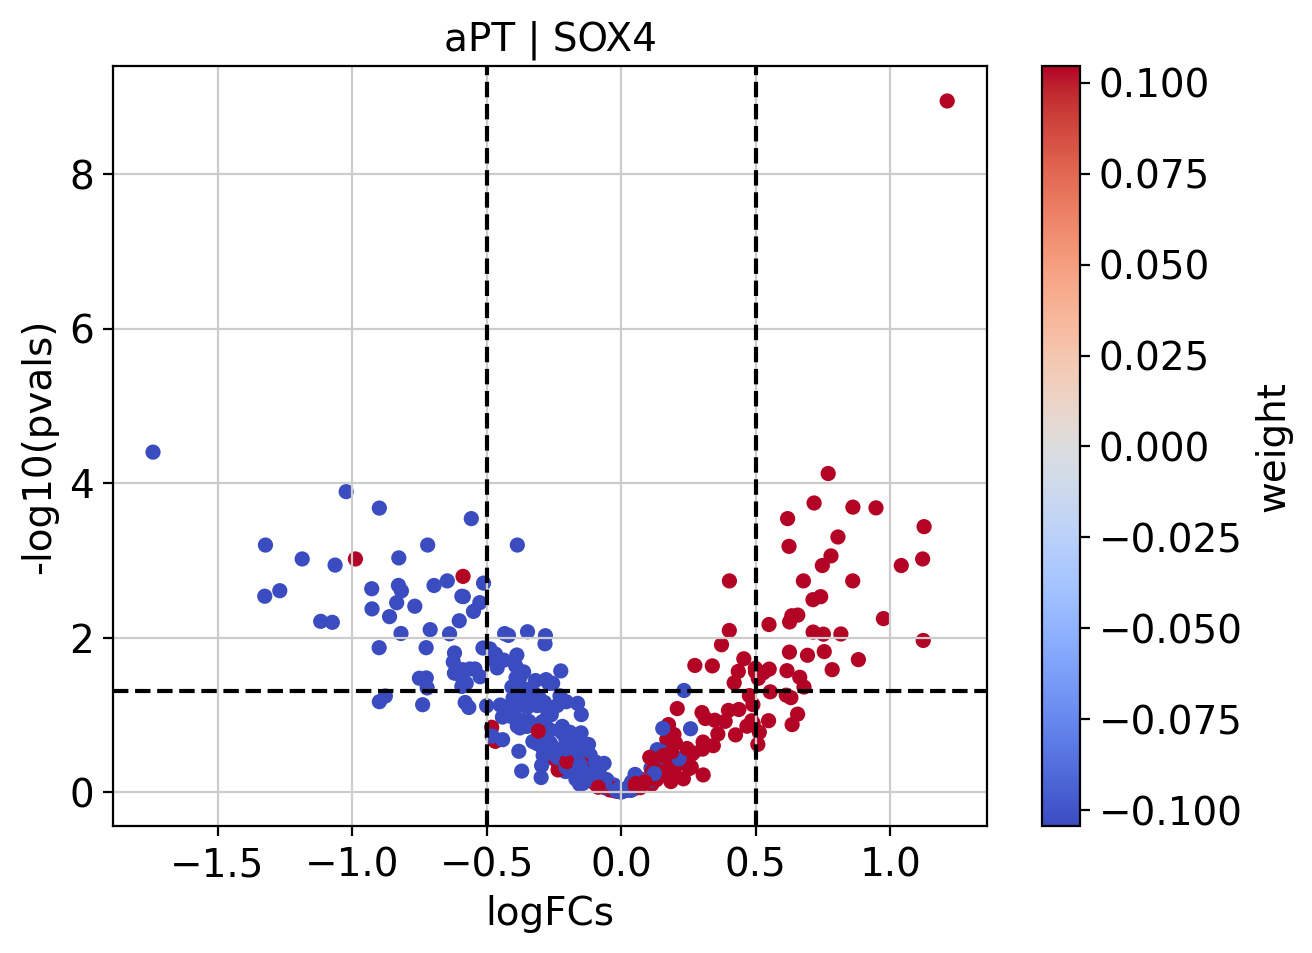

In [42]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'aPT'})
pvals = results_df[['padj']].T.rename(index={'padj': 'aPT'})

# Plot
dc.plot_volcano(
    logFCs=logFCs,
    pvals=pvals,
    contrast='aPT',
    name='SOX4',
    net=tf_gene,
    top=0,
    sign_thr=0.05,
    lFCs_thr=0.5,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_scMEGA_Volvano_SOX4_06182025_C.pdf'
)

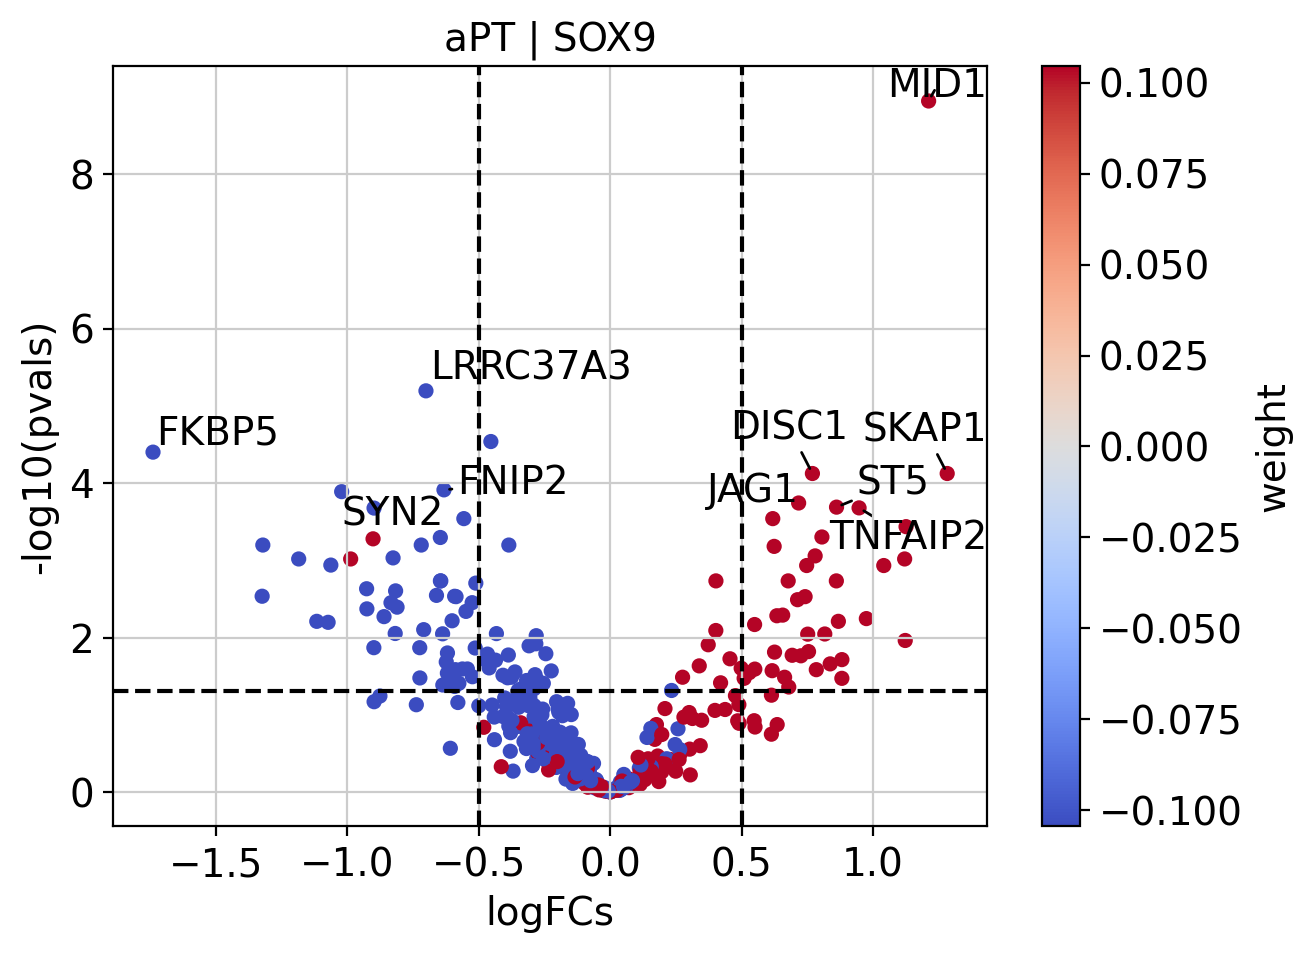

In [43]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'aPT'})
pvals = results_df[['padj']].T.rename(index={'padj': 'aPT'})

# Plot
dc.plot_volcano(
    logFCs=logFCs,
    pvals=pvals,
    contrast='aPT',
    name='SOX9',
    net=tf_gene,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_scMEGA_Volvano_SOX9_06182025.pdf'
)

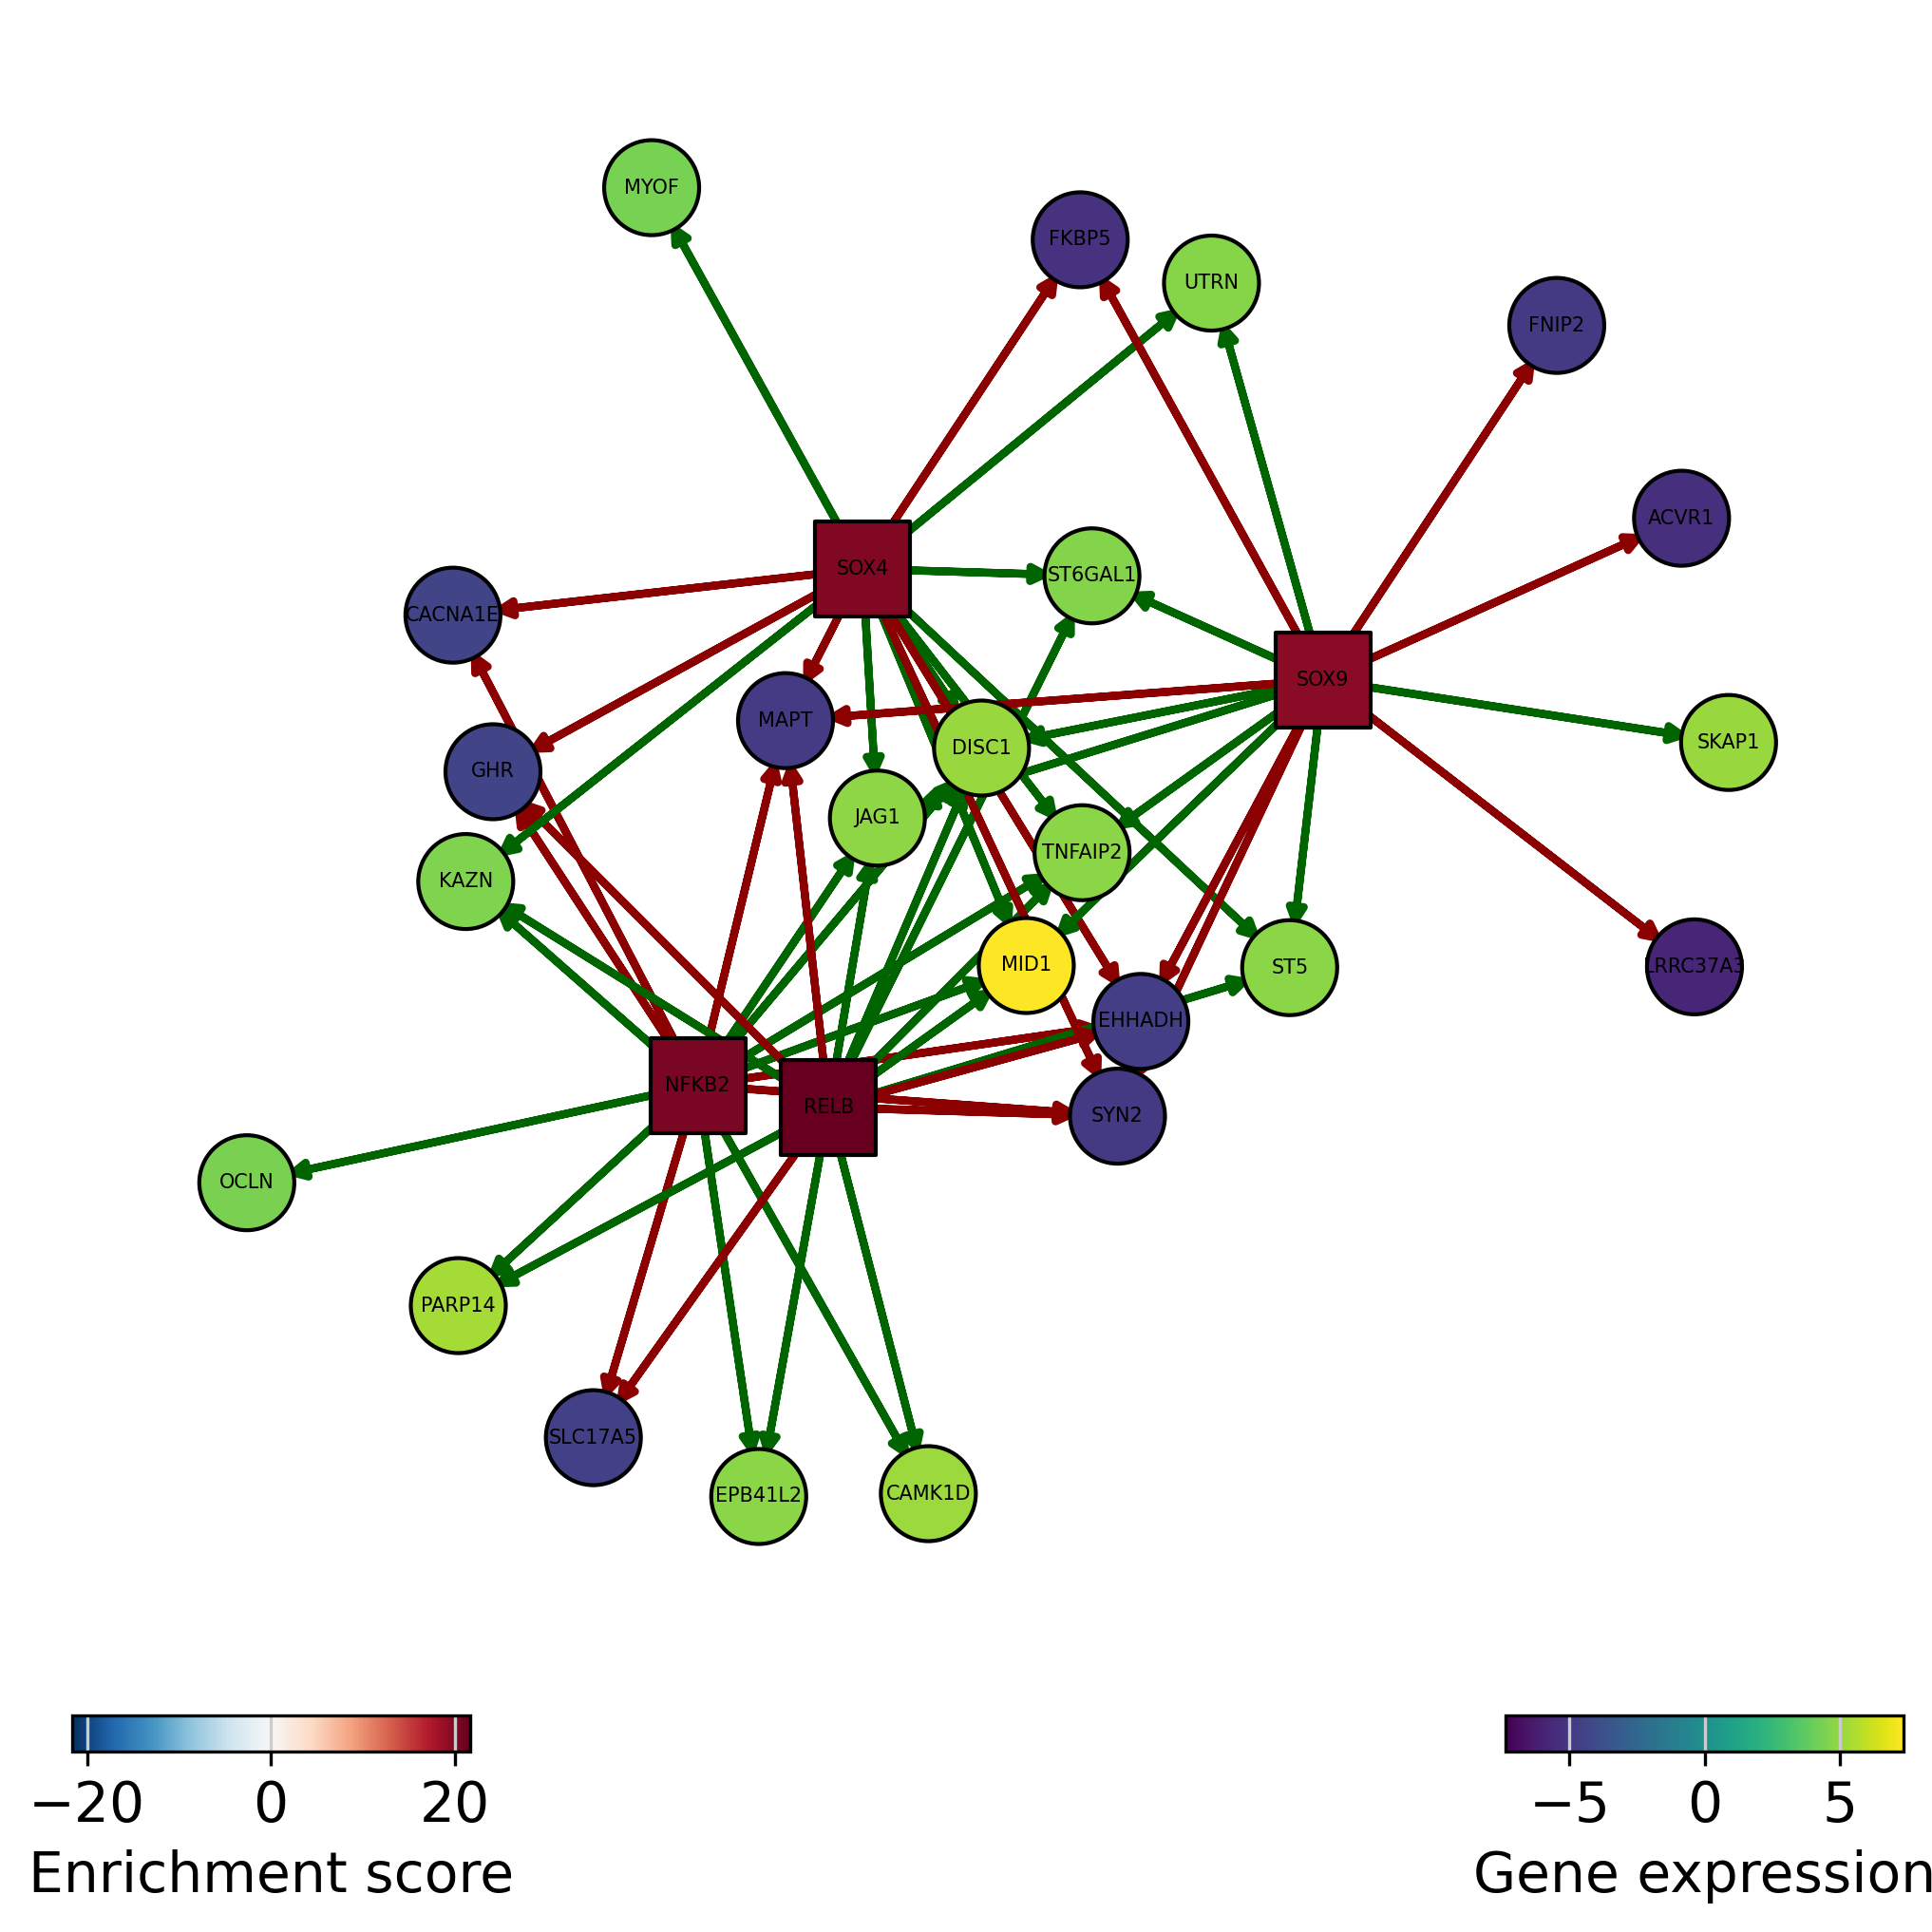

In [44]:
dc.plot_network(
    net=tf_gene,
    obs=mat,
    act=tf_acts,
    n_sources=['SOX4', 'SOX9', 'RELB', 'NFKB2'],
    n_targets=15,
    node_size=100,
    figsize=(7, 7),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_Network_scMEGA_SOX4_SOX9_RELB_NFKB2_06182025.pdf'
)

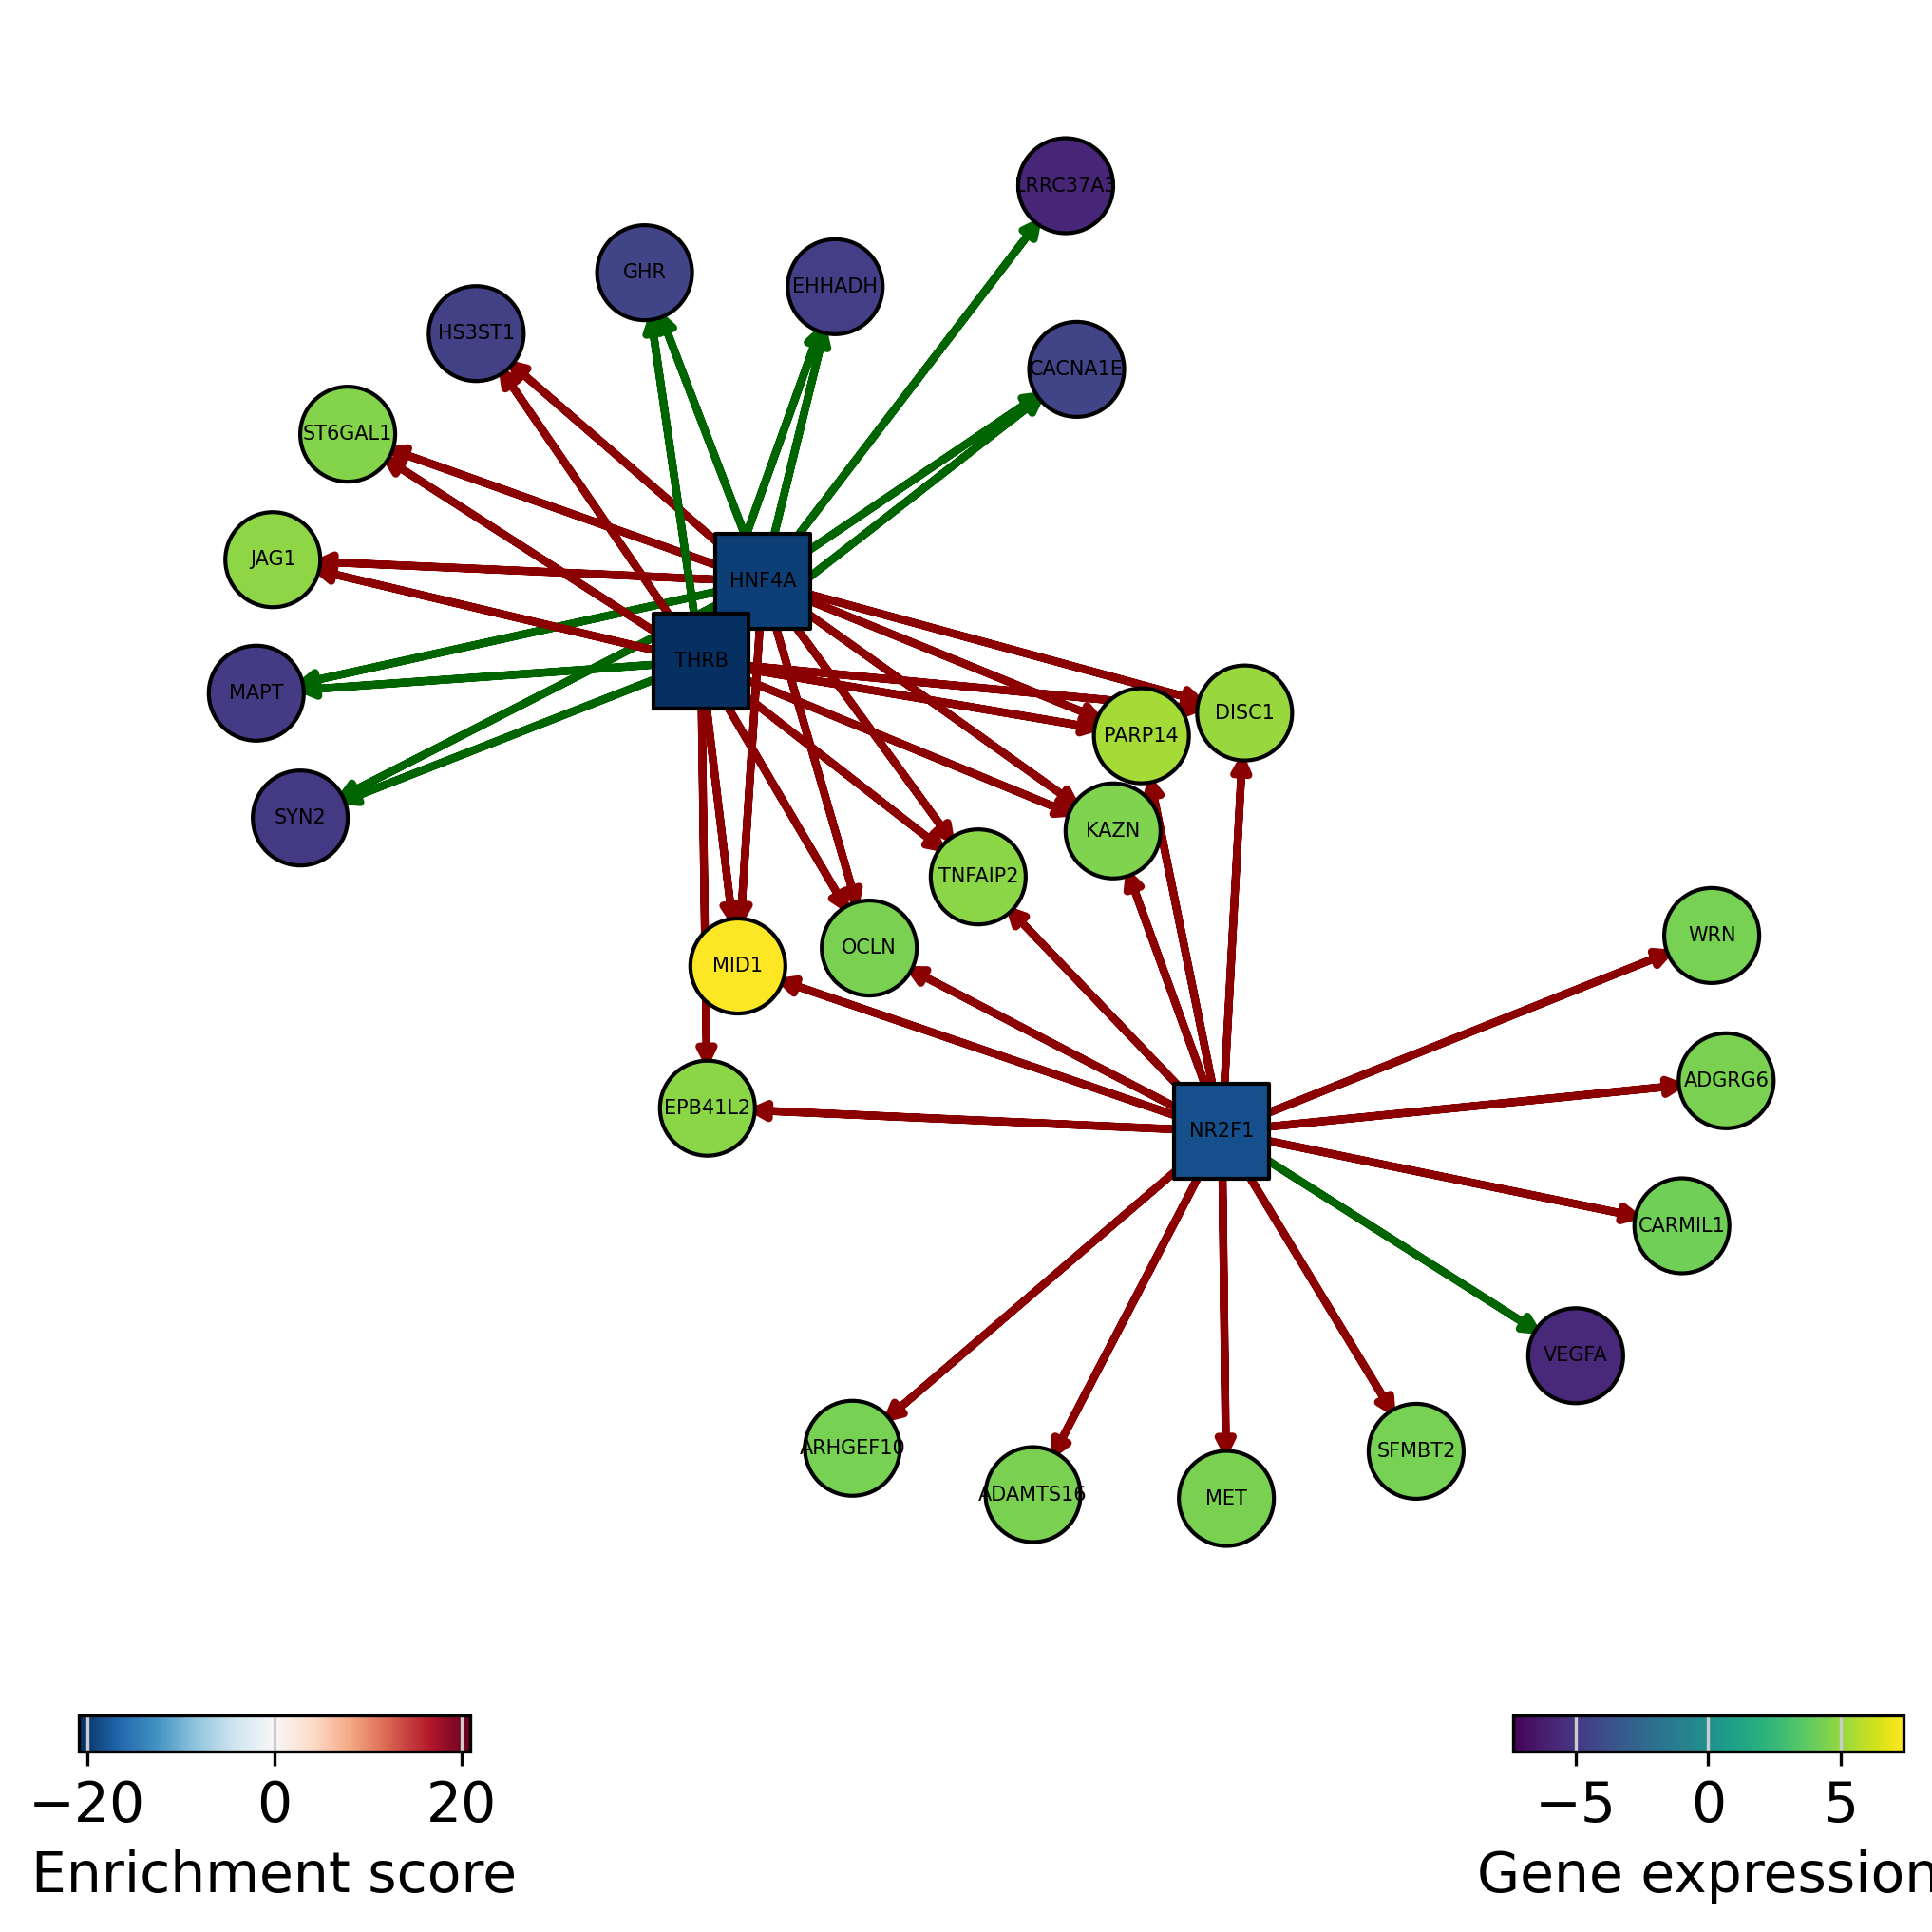

In [45]:
dc.plot_network(
    net=tf_gene,
    obs=mat,
    act=tf_acts,
    n_sources=['HNF4A', 'THRB', 'NR2F1'],
    n_targets=15,
    node_size=100,
    figsize=(7, 7),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save='/weka/blake/Projects/Human_Kidney/Atlas_V2/decoupleR/aPT_AKI-Prog_TF_Activity_Network_scMEGA_HNF4A_THRB_NR2F1_06182025.pdf'
)